In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import math as math
import brfss
import thinkstats2
import thinkplot


In [2]:
df = brfss.ReadBrfss(nrows=None)
df.shape



(414509, 6)

In [3]:
sample= thinkstats2.SampleRows(df,5000)
sample.head()
heights, weights = sample.htm3,sample.wtkg2

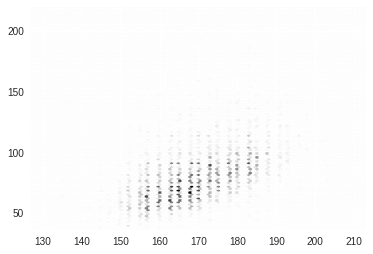

In [4]:
# plt.figure(figsize=(12,12))
plt.hexbin(heights,weights)


In [5]:
df = df.dropna(subset=['htm3','wtkg2'])
bins = np.arange(135,210,5)
indices = np.digitize(df.htm3,bins)

In [6]:
indices.max()

groups = df.groupby(indices)
#print groups.htm3.mean().to_frame()

heights = [group.htm3.mean() for i,group in groups]

#print heights
cdfs = [stats]
cdfs

[<module 'scipy.stats' from '/home/ramon/anaconda2/lib/python2.7/site-packages/scipy/stats/__init__.pyc'>]

In [7]:

heights = [group.htm3.mean() for i, group in groups]





def percentile_of_weight(percent,group):
  
    weigth_list = group.wtkg2.tolist()
    weigth_list.sort()
    index = percent/100*len(weigth_list)
    return weigth_list[int(index)]
    
    
   

        
group0 = groups.get_group(0)

print  percentile_of_weight(75,group0)


group0.wtkg2.quantile(0.75)
        
# for percentile in [25,50,75]:
#     for i,group in groups:
#         print percentile_of_weight(percentile,group)



71.0


71.0

In [14]:
df = df.dropna(subset=['htm3','wtkg2'])
bins = range(135,210,5)
bins.append(0)
bins.append(int(df.htm3.max()+1))
bins.sort()

labels = ["<135"]

labels+= ["<"+str(i) for i in bins[2:]]
print len(bins)
print (labels)
df['categories'] = pd.cut(df.htm3,bins,labels=labels)

df.tail()


17
['<135', '<140', '<145', '<150', '<155', '<160', '<165', '<170', '<175', '<180', '<185', '<190', '<195', '<200', '<205', '<237']


,age,sex,wtyrago,finalwt,wtkg2,htm3,categories,ranky
54591,70.0,1,81.818182,25.839513,79.55,229.0,<237,395828.5
342286,70.0,2,77.272727,20.888694,68.18,229.0,<237,395828.5
164154,79.0,2,102.272727,128.140577,102.27,229.0,<237,395828.5
125979,58.0,1,147.727273,176.282485,147.73,229.0,<237,395828.5
403966,79.0,1,136.363636,23.934809,70.45,236.0,<237,395832.0


In [9]:
df = df.sort_values(by='htm3')
groupy=df.groupby(df['categories'])
q75 = groupy.quantile(0.75)
q50 = groupy.quantile(0.50)
q25 = groupy.quantile(0.25)
q_list = [q25,q50,q75]


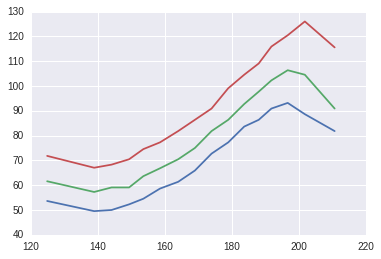

In [10]:
mean_height_per_categorie = groupy.htm3.mean()
for q in q_list:
    
    plt.plot(mean_height_per_categorie,q.wtyrago)


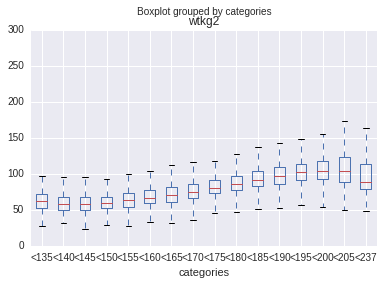

In [11]:
df.boxplot('wtkg2', by='categories')


In [12]:
df['ranky'] = df.htm3.rank()
df.tail()

,age,sex,wtyrago,finalwt,wtkg2,htm3,categories,ranky
54591,70.0,1,81.818182,25.839513,79.55,229.0,<237,395828.5
342286,70.0,2,77.272727,20.888694,68.18,229.0,<237,395828.5
164154,79.0,2,102.272727,128.140577,102.27,229.0,<237,395828.5
125979,58.0,1,147.727273,176.282485,147.73,229.0,<237,395828.5
403966,79.0,1,136.363636,23.934809,70.45,236.0,<237,395832.0
